In [21]:
import sys
sys.path.insert(0, "/work/ml_pipeline/regression_models/")


import numpy as np
import pandas as pd
from regression_models.processing.data_management import load_pipeline
from regression_models.config import config
#from regression_models.processing.validation import validate_inputs
from regression_models import __version__ as _version
from processing.data_management import load_dataset, save_pipeline
from sklearn.model_selection import train_test_split
from processing import preprocessors as pp
import glob
import logging
import typing as t

data = load_dataset(file_name=config.TRAINING_DATA_FILE)

# divide train and test
X_train, X_test, y_train, y_test = train_test_split(
        data[config.FEATURES], data[config.TARGET], test_size=0.1, random_state=0) 

In [22]:
loaded_models = [load_pipeline(file_name=i.split("/")[-1]) for i in glob.glob("trained_models/*")]

In [23]:
loaded_models

[Pipeline(memory=None,
      steps=[('SmilestoDescriptors', SmilestoDescriptors(mode=True)), ('DropChollinearityVif', DropChollinearityVif(threshold=10)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Linear_model', Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=0,
    selection='cyclic', tol=0.0001, warm_start=False))]),
 Pipeline(memory=None,
      steps=[('SmilestoDescriptors', SmilestoDescriptors(mode=True)), ('DropChollinearityVif', DropChollinearityVif(threshold=10)), ('rf_model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,...tors=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False))])]

In [24]:
predictions = []

for model in loaded_models:
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

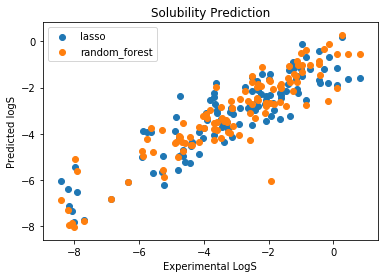

In [25]:
import numpy as np
import matplotlib.pyplot as plt
 
# 乱数を生成
for y_pred, name in zip(predictions, ["lasso", "random_forest"]):
    plt.scatter(y_test,y_pred, label=name)
    plt.title("Solubility Prediction")
    plt.xlabel("Experimental LogS")
    plt.ylabel("Predicted logS")
    plt.legend()